# Cálculo de Filtro Hodrick-Prescott & Análisis de Componentes Principales

In [1]:
# Dependencias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de archivos:
# 1. Rutas
PIB_data_to_load = "PIB_TRIM.csv"
IGAE_data_to_load = "IGAE_MEN.csv"

# 2. Carga de datos:
PIB_df = pd.read_csv(PIB_data_to_load)
IGAE_df = pd.read_csv(IGAE_data_to_load)

In [3]:
# Ajustes

#PIB_df['PIB_MEX'] = np.log(PIB_df['PIB_MEX'])
#PIB_df['GDP_USD'] = np.log(PIB_df['GDP_USD'])

PIB_df

,Periodo,PIB_MEX,GDP_USD
0,1993/01,10066121.86,6729.459
1,1993/02,10092487.93,6808.939
2,1993/03,10200852.22,6882.098
3,1993/04,10329632.31,7013.738
4,1994/01,10436716.63,7115.652
...,...,...,...
103,2018/04,18590228.01,20897.804
104,2019/01,18566766.49,21098.827
105,2019/02,18547684.05,21340.267
106,2019/03,18532013.87,21542.540


In [4]:
# Ajustes

#IGAE_df['IGAE_MEX'] = np.log(IGAE_df['IGAE_MEX'])
#IGAE_df['IPI_USA'] = np.log(IGAE_df['IPI_USA'])

IGAE_df

,Periodo,IGAE_MEX,IPI_USA
0,1993/01,61.665099,64.531306
1,1993/02,62.582519,64.817393
2,1993/03,62.341672,64.726652
3,1993/04,62.426948,64.953699
4,1993/05,63.035579,64.728203
...,...,...,...
319,2019/08,112.750030,106.499151
320,2019/09,112.958486,106.136283
321,2019/10,112.457406,105.679280
322,2019/11,112.601803,106.613838


## Filtro Hodrick-Prescott

### Hodrick-Prescott

Método tradicional de HP consiste en minimizar la serie $\{ \tau_t \}_{t=-1}^T$:

$$\sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=1}^{T} [(\tau_{t} - \tau_{t-1}) - (\tau_{t-1} - \tau_{t-2})]^2$$

Donde $\lambda$ es una parámetro fijo (determinado ex-ante) y $\tau_t$ es un componente de tendencia de $y_t$.

Sin pérdida de generalidad, asumiremos que $\tau_{-1}$ y $\tau_{0}$ son cero (0). De esta manera, la forma matricial del filtro HP es:
$$(Y - G)'(Y - G) + \lambda G' K' K G$$

La derivada de los anteriores:
$$-2 Y + 2 G + \lambda 2 K' K G = 0$$

Despejando:
$$G_{hp} = [I_T + \lambda K' K]^{-1} Y$$

Donde $G$ es el vector de tendencia, $Y$ es el vector de la serie de datos, $\lambda$ es la constante tradicional, y $K$ es de dimensión $T \times T$ y está dada por la expresión:
$$K = 
\begin{pmatrix}
1 & 0 & 0 & 0 & \ldots & 0 \\
-2 & 1 & 0 & 0 & \ldots & 0 \\
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

Así:

$$K' = 
\begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
0 & 0 & 1 & -2 & \ldots & 0 \\
0 & 0 & 0 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

In [5]:
# CASO: PIB Trimestral
# Definición de parámetros:
T = 108
Lambda = 1600
K = np.identity(T)

In [6]:
K

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
for i, j in itertools.product(range(T), range(T)):
    if i - 1 == j:
        K[i][j] = -2
    if i - 2 == j:
        K[i][j] = 1

In [8]:
K

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

In [9]:
np.transpose(K)

array([[ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [10]:
Y = np.array(PIB_df['PIB_MEX'])
Y

array([10066121.86, 10092487.93, 10200852.22, 10329632.31, 10436716.63,
       10655450.27, 10742186.42, 10861848.51, 10238043.32,  9736364.21,
        9926096.96, 10110488.97, 10367229.46, 10518854.09, 10703541.26,
       11018639.93, 11037680.74, 11293348.09, 11512936.17, 11790790.53,
       11903392.13, 11990433.81, 12045238.13, 12063955.33, 12195322.24,
       12265454.45, 12364920.6 , 12493022.47, 12722924.59, 12927620.25,
       13028513.1 , 12942040.77, 12957763.08, 12879137.31, 12882651.4 ,
       12821843.85, 12742924.66, 12853100.83, 12940661.04, 12980917.97,
       13015289.95, 13041188.38, 13040282.67, 13176382.76, 13343988.17,
       13570141.95, 13551818.37, 13718241.91, 13741612.99, 13782648.62,
       13909178.65, 14129444.56, 14378259.9 , 14520155.2 , 14564962.75,
       14596400.26, 14699980.57, 14812820.95, 14905521.63, 14965263.14,
       14915886.46, 15048665.69, 15092670.04, 14852544.92, 14096777.9 ,
       13881028.27, 14331726.67, 14580211.04, 14738249.1 , 14890

In [11]:
I_T = np.identity(T)
I_T

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
np.matmul( np.transpose(K), K) 

array([[ 6., -4.,  1., ...,  0.,  0.,  0.],
       [-4.,  6., -4., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ..., -4.,  5., -2.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

In [13]:
G_HP = np.matmul( np.linalg.inv( I_T + Lambda * np.matmul( np.transpose(K), K) ), Y)
G_HP

array([  233665.36423566,   650303.83769817,  1205368.45068861,
        1860213.59856572,  2581815.85404407,  3342445.17653286,
        4119280.83842629,  4894072.74030196,  5652710.09872595,
        6384811.99012042,  7082863.32417082,  7741443.73070005,
        8356909.86055336,  8927099.01785061,  9451104.95646129,
        9929016.27717498, 10361704.35347099, 10750721.57361162,
       11098042.81110079, 11405982.08101513, 11677112.70678061,
       11914248.51710379, 12120344.76533076, 12298404.32061566,
       12451383.11046555, 12582090.53176835, 12693175.94336794,
       12787090.80655711, 12866081.42303902, 12932210.3018065 ,
       12987450.47883173, 13033772.12130448, 13073171.0605528 ,
       13107585.79581013, 13138882.6963221 , 13168785.35103069,
       13198857.20431768, 13230444.86212671, 13264609.97256123,
       13302178.3437046 , 13343773.31555732, 13389817.44038633,
       13440527.9683551 , 13495904.25646432, 13555695.50840326,
       13619451.22692586, 13686588.59769

In [14]:
Ciclo = Y - G_HP
Ciclo

array([ 9.83245650e+06,  9.44218409e+06,  8.99548377e+06,  8.46941871e+06,
        7.85490078e+06,  7.31300509e+06,  6.62290558e+06,  5.96777577e+06,
        4.58533322e+06,  3.35155222e+06,  2.84323364e+06,  2.36904524e+06,
        2.01031960e+06,  1.59175507e+06,  1.25243630e+06,  1.08962365e+06,
        6.75976387e+05,  5.42626516e+05,  4.14893359e+05,  3.84808449e+05,
        2.26279423e+05,  7.61852929e+04, -7.51066353e+04, -2.34448991e+05,
       -2.56060870e+05, -3.16636082e+05, -3.28255343e+05, -2.94068337e+05,
       -1.43156833e+05, -4.59005181e+03,  4.10626212e+04, -9.17313513e+04,
       -1.15407981e+05, -2.28448486e+05, -2.56231296e+05, -3.46941501e+05,
       -4.55932544e+05, -3.77344032e+05, -3.23948933e+05, -3.21260374e+05,
       -3.28483366e+05, -3.48629060e+05, -4.00245298e+05, -3.19521496e+05,
       -2.11707338e+05, -4.93092769e+04, -1.34770228e+05, -3.82520781e+04,
       -8.68565441e+04, -1.19144844e+05, -6.65110712e+04,  8.01367770e+04,
        2.56504342e+05,  

In [15]:
Filtro_DF = pd.DataFrame({'Periodo': PIB_df['Periodo'], 'PIB_MEX': PIB_df['PIB_MEX'],'Tendencia': G_HP, 'Ciclo': Ciclo})
Filtro_DF.head(20)

,Periodo,PIB_MEX,Tendencia,Ciclo
0,1993/01,10066121.86,2.336654e+05,9.832456e+06
1,1993/02,10092487.93,6.503038e+05,9.442184e+06
2,1993/03,10200852.22,1.205368e+06,8.995484e+06
3,1993/04,10329632.31,1.860214e+06,8.469419e+06
4,1994/01,10436716.63,2.581816e+06,7.854901e+06
5,1994/02,10655450.27,3.342445e+06,7.313005e+06
6,1994/03,10742186.42,4.119281e+06,6.622906e+06
7,1994/04,10861848.51,4.894073e+06,5.967776e+06
8,1995/01,10238043.32,5.652710e+06,4.585333e+06
9,1995/02,9736364.21,6.384812e+06,3.351552e+06


In [16]:
# Seleccionamos los datos más ajustados:

Filtro_DF_2 = Filtro_DF[20: ]
Filtro_DF_2

,Periodo,PIB_MEX,Tendencia,Ciclo
20,1998/01,11903392.13,1.167711e+07,226279.423219
21,1998/02,11990433.81,1.191425e+07,76185.292896
22,1998/03,12045238.13,1.212034e+07,-75106.635331
23,1998/04,12063955.33,1.229840e+07,-234448.990616
24,1999/01,12195322.24,1.245138e+07,-256060.870466
...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,44582.045071
104,2019/01,18566766.49,1.862334e+07,-56576.083281
105,2019/02,18547684.05,1.869999e+07,-152307.610781
106,2019/03,18532013.87,1.877606e+07,-244042.834809


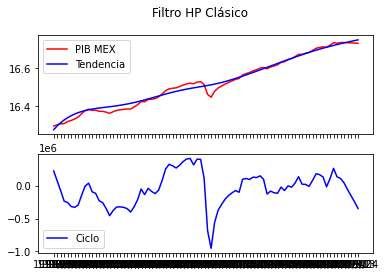

In [17]:
# Grafica:
Time = Filtro_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico')
axs[0].plot(Time, np.log(Filtro_DF_2['PIB_MEX']), label = 'PIB MEX', color = 'red', linestyle = '-')
axs[0].plot(Time, np.log(Filtro_DF_2['Tendencia']), label = 'Tendencia', color = 'blue', linestyle = '-')
axs[0].legend()
axs[1].plot(Time, Filtro_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].legend()

# Save the Figure
plt.savefig("HP_PIB_MX.png")

# Show the Figure
plt.show()

In [18]:
# Calculo del F(Lamda):
F_Lambda = np.matmul( np.matmul(np.transpose(G_HP), np.transpose(K)), np.matmul(K, G_HP) ) / np.matmul( np.transpose(Y - G_HP), (Y - G_HP) )
F_Lambda

0.0002517616835493242

In [19]:
Filtro_DF.to_csv('Filtro_HP_Mexico.csv', index = False)

In [20]:
#################################################################
# Caso de Estados Unidos:
Y_USA = np.array(PIB_df['GDP_USD'])
G_HP_USA = np.matmul( np.linalg.inv( I_T + Lambda*np.matmul( np.transpose(K), K) ), Y_USA)
G_HP_USA

array([  167.82548296,   468.42391244,   870.84377297,  1348.09637098,
        1876.95004682,  2437.71416685,  3013.97228613,  3592.31372028,
        4162.02597408,  4714.81091125,  5244.47055991,  5746.59831446,
        6218.31172835,  6657.99459732,  7065.0620648 ,  7439.78855255,
        7783.1149486 ,  8096.49462997,  8381.74318621,  8640.94016338,
        8876.34078239,  9090.27836846,  9285.08008379,  9462.99772848,
        9626.18061321,  9776.67241946,  9916.38625582, 10047.07740561,
       10170.35457075, 10287.73414103, 10400.62782025, 10510.42227777,
       10618.45368116, 10726.0135747 , 10834.30251851, 10944.44095295,
       11057.40056308, 11173.97544209, 11294.79190284, 11420.3007779 ,
       11550.76368679, 11686.2242254 , 11826.49645421, 11971.16109041,
       12119.63686968, 12271.21634889, 12425.06741747, 12580.25657154,
       12735.77422755, 12890.57465724, 13043.62810909, 13193.91698613,
       13340.4857195 , 13482.46523968, 13619.15113172, 13750.00606865,
      

In [21]:
F_Lambda_US = np.matmul( np.matmul(np.transpose(G_HP_USA), np.transpose(K)), np.matmul(K, G_HP_USA) ) / np.matmul( np.transpose(Y_USA - G_HP_USA), (Y_USA - G_HP_USA) )
F_Lambda_US

0.00028289425385776164

In [22]:
# Determinar un Lambda Óptima:
Lambda_ss = 1419

G_HP_ss = np.matmul( np.linalg.inv( I_T + Lambda_ss*np.matmul( np.transpose(K), K) ), Y)

F_Lambda_ss = np.matmul( np.matmul(np.transpose(G_HP_ss), np.transpose(K)), np.matmul(K, G_HP_ss) ) / np.matmul( np.transpose(Y - G_HP_ss), (Y - G_HP_ss) )
F_Lambda_ss

0.00028263777208386605

In [23]:
F_Lambda

0.0002517616835493242

### Hodrick-Prescott por el Método de Ajuste de Colas (St-Amant & van Norden)

### Hodrick-Prescott planteado por St-Amant & van Norden

Método modificado de HP consiste en minimizar los valores de la serie $\{ \tau_t \}_{t=1}^T$:
$$\sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} [(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})]^2 + \lambda_{ss} \sum_{t=T-j}^{T} [\Delta \tau_t - u_{ss}]$$

Donde $\lambda$ es una parámetro fijo (determinado ex-ante), $\tau_t$ es un componente de tendencia de $y_t$, y los nuevos parámetros son $u_{ss}$ y $\lambda_{ss}$ ajustadas por el procedimiento de Marcet y Ravn (2004).

Este procedimiento asume que parte del filtro HP y que esta versión tiene el problema de pérdida de información al final y al principio de la muestra. La razón es que es un procedimeinto univariado que requiere de mucha información futura y pasada para mejorar el ajuste.

El compoenente adicional al filtro HP es un componente de castigo por desviaciones de la tasa de crecimiento de largo plazo, $u_{ss}$.

El proceso de selección de $\lambda_{ss}$ es e propuesto por Marcet y Ravn (2004), el cual consiste en utilizar un $\lambda$ convencional y el filtro HP convencional para estimar la siguiente función:
$$F(\lambda) = \frac{\sum_{t=2}^{T-1} ((\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}))^2}{\sum_{t=1}^T (y_t - \tau_t)^2}$$

Entonces el valor de $\lambda_{ss}$ será aquel que:
$$F(\lambda_{ss}) = \frac{\sum_{t=2}^{T-1} ((\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1}))^2}{\sum_{t=1}^T (y_t - \tau_t)^2} = F(\lambda)$$

nota: Antón (2009) estimó $\lambda_{ss} = 1096$ para datos trimestrales del PIB.

La forma matricial del filtro HP-SAVN es:
$$(Y - G)'(Y - G) + \lambda G' K' K G + \lambda_{ss} (L^j G + \overline{u}_{ss} M^j)$$

Donde $L^j = (0, 0, \ldots, 0, -1, 0, \ldots, 0, 1)$, en el cual el valor $-1$ es en la posición $T-j-1$-ésima, y $M^j$ es un vector que toma valores de cero hasta antes de $T-j$ y de 1 después. 

La derivada de los anteriores:
$$-2 Y + 2 G + \lambda 2 K' K G + \lambda_{ss} L'^j = 0$$

Despejando:
$$G_{SAVN} = \frac{1}{2} [I_T + \lambda K' K]^{-1} (2 Y - \lambda_{ss} L'^j)$$

$$G_{SAVN} = [I_T + \lambda K' K]^{-1} Y - \frac{1}{2} [I_T + \lambda K' K]^{-1} \lambda_{ss} L'^j$$

Donde $G$ es el vector de tendencia, $Y$ es el vector de la serie de datos, $\lambda$ es la constante tradicional, y $K$ es de dimensión $T \times T$ y está dada por la expresión:

$$K' = 
\begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & \vdots &  \vdots &  \vdots &  \vdots &  \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 \\
\end{pmatrix}
$$

Dicho lo anterior, podemos modificar $F(\lambda)$ para el filtro HP convencional como en forma matricial:
$$F(\lambda) = \frac{G' K' K G}{(Y - G)'(Y - G)}$$

In [56]:
# Definición de variables adicionales:
Lambda = 1600
#Lambda = Lambda_ss
j = 4
L_j = np.zeros(T)
L_j[T-1] = 1
L_j[T-j-1] = -1
L_j

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  1.])

In [58]:
# Filtro Ajustado a colas

G_HP_SAVN = (1/2) * np.matmul( np.linalg.inv( I_T + Lambda * np.matmul( np.transpose(K), K) ), ( 2 * Y - Lambda_ss*L_j ) ) 

G_HP_SAVN

array([  233665.36420494,   650303.83761136,  1205368.45052568,
        1860213.59831203,  2581815.85369049,  3342445.17607595,
        4119280.83786846,  4894072.7396518 ,  5652710.09799857,
        6384811.98933785,  7082863.32336246,  7741443.72990314,
        8356909.85981353,  8927099.01722233,  9451104.95600837,
        9929016.27697094, 10361704.35359935, 10750721.57416603,
       11098042.81218494, 11405982.08274242, 11677112.70927344,
       11914248.52049251, 12120344.76975211, 12298404.32621065,
       12451383.11737668, 12582090.54013615, 12693175.95332664,
       12787090.81822936, 12866081.43652974, 12932210.31719554,
       12987450.49616544, 13033772.14058612, 13073171.08173169,
       13107585.8187696 , 13138882.72086625, 13168785.37687003,
       13198857.23105381, 13230444.88923616, 13264609.99937872,
       13302178.36940614, 13343773.33914342, 13389817.46066597,
       13440527.98393096, 13495904.26572015, 13555695.5094941 ,
       13619451.21777228, 13686588.57598

In [59]:
Ciclo_SAVN = Y - G_HP_SAVN
Ciclo_SAVN

array([ 9.83245650e+06,  9.44218409e+06,  8.99548377e+06,  8.46941871e+06,
        7.85490078e+06,  7.31300509e+06,  6.62290558e+06,  5.96777577e+06,
        4.58533322e+06,  3.35155222e+06,  2.84323364e+06,  2.36904524e+06,
        2.01031960e+06,  1.59175507e+06,  1.25243630e+06,  1.08962365e+06,
        6.75976386e+05,  5.42626516e+05,  4.14893358e+05,  3.84808447e+05,
        2.26279421e+05,  7.61852895e+04, -7.51066398e+04, -2.34448996e+05,
       -2.56060877e+05, -3.16636090e+05, -3.28255353e+05, -2.94068348e+05,
       -1.43156847e+05, -4.59006720e+03,  4.10626038e+04, -9.17313706e+04,
       -1.15408002e+05, -2.28448509e+05, -2.56231321e+05, -3.46941527e+05,
       -4.55932571e+05, -3.77344059e+05, -3.23948959e+05, -3.21260399e+05,
       -3.28483389e+05, -3.48629081e+05, -4.00245314e+05, -3.19521506e+05,
       -2.11707339e+05, -4.93092678e+04, -1.34770206e+05, -3.82520413e+04,
       -8.68564894e+04, -1.19144769e+05, -6.65109718e+04,  8.01369035e+04,
        2.56504499e+05,  

In [61]:
Filtro_SAVN_DF = pd.DataFrame({'Periodo': PIB_df['Periodo'], 'PIB_MEX': PIB_df['PIB_MEX'], 
                          'Tendencia': G_HP, 'Ciclo': Ciclo,
                          'Tendencia_SAVN': G_HP_SAVN, 'Ciclo_SAVN' :Ciclo_SAVN})
Filtro_SAVN_DF.head(20)

,Periodo,PIB_MEX,Tendencia,Ciclo,Tendencia_SAVN,Ciclo_SAVN
0,1993/01,10066121.86,2.336654e+05,9.832456e+06,2.336654e+05,9.832456e+06
1,1993/02,10092487.93,6.503038e+05,9.442184e+06,6.503038e+05,9.442184e+06
2,1993/03,10200852.22,1.205368e+06,8.995484e+06,1.205368e+06,8.995484e+06
3,1993/04,10329632.31,1.860214e+06,8.469419e+06,1.860214e+06,8.469419e+06
4,1994/01,10436716.63,2.581816e+06,7.854901e+06,2.581816e+06,7.854901e+06
5,1994/02,10655450.27,3.342445e+06,7.313005e+06,3.342445e+06,7.313005e+06
6,1994/03,10742186.42,4.119281e+06,6.622906e+06,4.119281e+06,6.622906e+06
7,1994/04,10861848.51,4.894073e+06,5.967776e+06,4.894073e+06,5.967776e+06
8,1995/01,10238043.32,5.652710e+06,4.585333e+06,5.652710e+06,4.585333e+06
9,1995/02,9736364.21,6.384812e+06,3.351552e+06,6.384812e+06,3.351552e+06


In [62]:
# Seleccionamos los datos más ajustados:

Filtro_SAVN_DF_2 = Filtro_SAVN_DF[20: ]
Filtro_SAVN_DF_2

,Periodo,PIB_MEX,Tendencia,Ciclo,Tendencia_SAVN,Ciclo_SAVN
20,1998/01,11903392.13,1.167711e+07,226279.423219,1.167711e+07,226279.420727
21,1998/02,11990433.81,1.191425e+07,76185.292896,1.191425e+07,76185.289507
22,1998/03,12045238.13,1.212034e+07,-75106.635331,1.212034e+07,-75106.639752
23,1998/04,12063955.33,1.229840e+07,-234448.990616,1.229840e+07,-234448.996211
24,1999/01,12195322.24,1.245138e+07,-256060.870466,1.245138e+07,-256060.877377
...,...,...,...,...,...,...
103,2018/04,18590228.01,1.854565e+07,44582.045066,1.854563e+07,44599.772060
104,2019/01,18566766.49,1.862334e+07,-56576.083286,1.862332e+07,-56549.060348
105,2019/02,18547684.05,1.869999e+07,-152307.610787,1.869995e+07,-152270.158848
106,2019/03,18532013.87,1.877606e+07,-244042.834815,1.877601e+07,-243994.172762


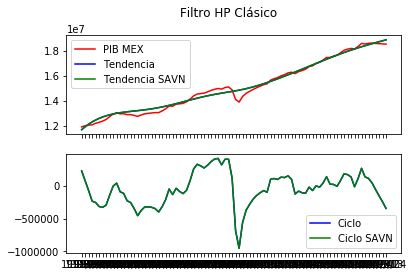

In [63]:
# Gráfica:
Time = Filtro_SAVN_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico')
axs[0].plot(Time, Filtro_SAVN_DF_2['PIB_MEX'], label = 'PIB MEX', color = 'red', linestyle = '-')
axs[0].plot(Time, Filtro_SAVN_DF_2['Tendencia'], label = 'Tendencia', color = 'blue', linestyle = '-')
axs[0].plot(Time, Filtro_SAVN_DF_2['Tendencia_SAVN'], label = 'Tendencia SAVN', color = 'green', linestyle = '-')
axs[0].legend()
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')
axs[1].legend()

# Save the Figure
plt.savefig("HP_PIB_MX_SAVN.png")

# Show the Figure
plt.show()

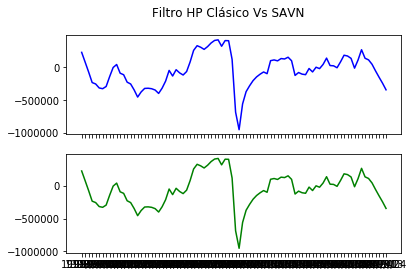

In [64]:
# Gráfica sólo Ciclo:
Time = Filtro_SAVN_DF_2['Periodo']

fig, axs = plt.subplots(2, sharex = True, sharey = False)
fig.suptitle('Filtro HP Clásico Vs SAVN')

axs[0].plot(Time, Filtro_SAVN_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
axs[1].plot(Time, Filtro_SAVN_DF_2['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')


# Save the Figure
plt.savefig("CICLO_PIB_MX_SAVN.png")

# Show the Figure
plt.show()

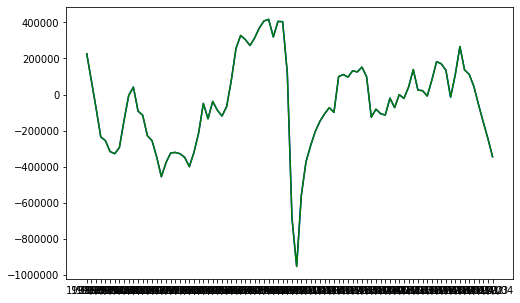

In [65]:
# Gráfica sólo Ciclo:
Time = Filtro_SAVN_DF_2['Periodo']

plt.figure(figsize = (8, 5))
plt.plot(Time, Filtro_SAVN_DF_2['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
plt.plot(Time, Filtro_SAVN_DF_2['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')


# Save the Figure
plt.savefig("CICLO_PIB_MX_SAVN.png")

# Show the Figure
plt.show()

In [67]:
# Seleccionamos los datos más ajustados en los últimos años:

Filtro_SAVN_DF_3 = Filtro_SAVN_DF_2[40: ]
Filtro_SAVN_DF_3

,Periodo,PIB_MEX,Tendencia,Ciclo,Tendencia_SAVN,Ciclo_SAVN
60,2008/01,14915886.46,1.459633e+07,319559.214855,1.459633e+07,319559.703149
61,2008/02,15048665.69,1.464279e+07,405872.928896,1.464279e+07,405873.459082
62,2008/03,15092670.04,1.468850e+07,404171.994102,1.468850e+07,404172.561865
63,2008/04,14852544.92,1.473472e+07,117821.103900,1.473472e+07,117821.702792
64,2009/01,14096777.90,1.478300e+07,-686225.495778,1.478300e+07,-686224.874694
65,2009/02,13881028.27,1.483494e+07,-953915.477190,1.483494e+07,-953914.845711
66,2009/03,14331726.67,1.489172e+07,-559996.271659,1.489172e+07,-559995.644835
67,2009/04,14580211.04,1.495392e+07,-373711.813336,1.495392e+07,-373711.209860
68,2010/01,14738249.10,1.502178e+07,-283526.258699,1.502177e+07,-283525.701303
69,2010/02,14890721.75,1.509528e+07,-204557.014347,1.509528e+07,-204556.530175


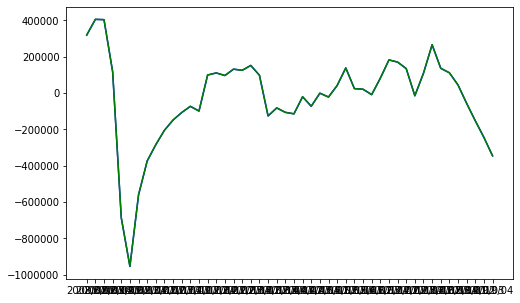

In [70]:
# Gráfica sólo Ciclo:
Time = Filtro_SAVN_DF_3['Periodo']

plt.figure(figsize = (8, 5))
plt.plot(Time, Filtro_SAVN_DF_3['Ciclo'], label = 'Ciclo', color = 'blue', linestyle = '-')
plt.plot(Time, Filtro_SAVN_DF_3['Ciclo_SAVN'], label = 'Ciclo SAVN', color = 'green', linestyle = '-')


# Save the Figure
plt.savefig("CICLO_PIB_MX_SAVN_Corto.png")

# Show the Figure
plt.show()

## Análisis de Componentes Principales